# Import of data for location based covid prediction and zoning the address

Importing all the required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Picking up the dynamic daily dump of COVID data based on geo location from www.trackcorona.live api and reading it into a data frame

In [2]:
data_json=requests.get(url = 'https://www.trackcorona.live/api/cities').json()
df_states = pd.read_json(json.dumps(data_json['data']))
print(df_states)
df_states_needed = df_states[['latitude','longitude','confirmed','dead', 'recovered']]
df_states_needed.head()

                           location country_code   latitude  longitude  \
0             Trumbull County, Ohio           us  41.306498 -80.721442   
1                       Bloemendaal           nl  52.404947   4.620185   
2                       Pilõezinhos           br  -6.843131 -35.530578   
3                           Pavussu           br  -7.964325 -43.224345   
4         Douglas County, Minnesota           us  45.927939 -95.421881   
...                             ...          ...        ...        ...   
9892         Cross County, Arkansas           us  35.299891 -90.829400   
9893  Somerset County, Pennsylvania           us  40.022493 -78.928824   
9894      Woodruff County, Arkansas           us  35.121585 -91.135302   
9895    Montgomery County, Maryland           us  39.154743 -77.240515   
9896     Palm Beach County, Florida           us  26.651450 -80.276733   

      confirmed   dead  recovered  velocity_confirmed  velocity_dead  \
0          1408  102.0        NaN      

,latitude,longitude,confirmed,dead,recovered
0,41.306498,-80.721442,1408,102.0,NaN
1,52.404947,4.620185,1,0.0,NaN
2,-6.843131,-35.530578,87,0.0,NaN
3,-7.964325,-43.224345,2,1.0,NaN
4,45.927939,-95.421881,126,0.0,NaN


# EDA of data for location based covid prediction and zoning the address

In [3]:
#EDA
df_states_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9897 non-null   float64
 1   longitude  9897 non-null   float64
 2   confirmed  9897 non-null   int64  
 3   dead       9651 non-null   float64
 4   recovered  1241 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 386.7 KB


In [4]:
print(df_states_needed.describe())
print(df_states_needed.isnull().sum())

          latitude    longitude      confirmed          dead     recovered
count  9897.000000  9897.000000    9897.000000   9651.000000   1241.000000
mean     13.905098   -43.661826     918.218248     42.304839   1206.166801
std      28.990097    52.431107    5913.780246    405.200397   4437.156149
min     -52.368047  -174.159607       0.000000      0.000000      0.000000
25%     -15.233475   -82.993161       8.000000      0.000000      5.000000
50%      25.355684   -49.012425      52.000000      1.000000     33.000000
75%      39.807989   -37.151764     304.000000      6.000000    367.000000
max      70.071821   171.695216  225460.000000  23536.000000  73512.000000
latitude        0
longitude       0
confirmed       0
dead          246
recovered    8656
dtype: int64


Performing a heat map to find the correlation between various columns here we find confirmed and dead are related to recovered which makes logical sense

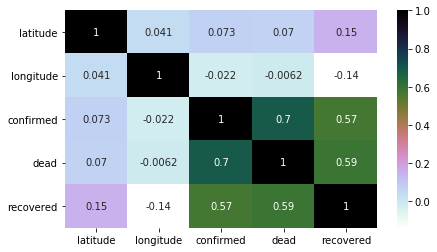

In [5]:
df_states_needed.fillna(0)
plt.figure(figsize=(7,4))
sns.heatmap(df_states_needed.corr(),annot=True,cmap='cubehelix_r')#draws heatmap with input as the correlation matrix calculated by (iris_data.corr())
plt.show()

In the heat map we were not able to find relationship between geo location and covid concentrations so we are trying a scatter plot here. It clearly indicates that covid high locations are highly clustered. Hence its worth to find a covid index at a place based on localized data for that geo location

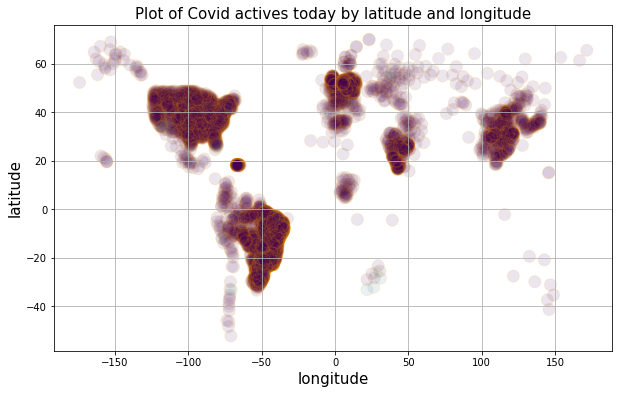

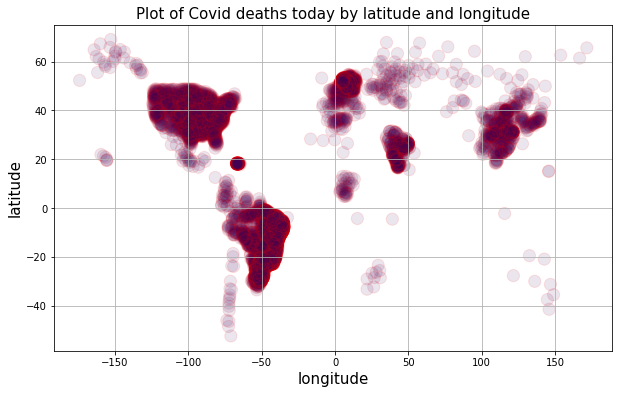

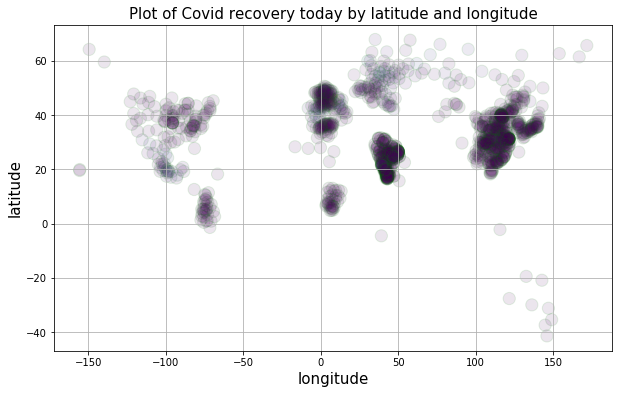

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['confirmed'],edgecolors='orange',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid actives today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['dead'],edgecolors='red',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid deaths today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df_states_needed['longitude'],df_states_needed['latitude'],c=df_states_needed['recovered'],edgecolors='green',alpha=0.10,s=150)
plt.grid(True)
plt.xlim()
plt.title("Plot of Covid recovery today by latitude and longitude",fontsize=15)
plt.xlabel("longitude",fontsize=15)
plt.ylabel("latitude",fontsize=15)
plt.show()


# KNN for predicting location based covid prediction and zoning the address

Splitting into training and testing data

In [7]:
#ML to find covid index for a given geographic location

from sklearn.model_selection import train_test_split
X=df_states_needed[['latitude','longitude']]
y=df_states_needed[['confirmed','dead','recovered']].fillna(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7917, 2)
(1980, 2)


Since we already found covid has relation to location we are trying to create a model by using K nearest neighbour algorithm to find the mean covid indexes for a given geographic location. Below is the MSE analysis for the model to figure out the perfect number of neighbours to get accurate results

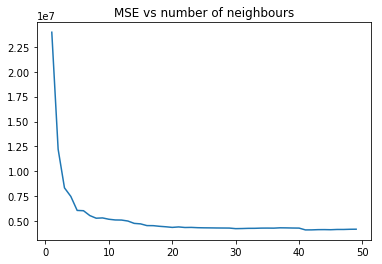

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
a=[]
c=[]
for n_value in  range(1,50):
    knnr = KNeighborsRegressor(n_neighbors = n_value)
    knnr.fit(X_train, y_train)
    a.append(n_value)
    c.append(mean_squared_error(y_test,knnr.predict(X_test)))
plt.plot(a,c)
plt.title("MSE vs number of neighbours")
plt.show()

One more try at optimizing the parameters of the KNN

In [9]:
params = {'n_neighbors': list(range(2,10))}
knnr = KNeighborsRegressor()
model = GridSearchCV(knnr, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

Finally we pick up an address to perform our predictions. Feel free to change the address to other locations in USA and check
Right here we are able to predict the covid active rate and deaths based on a given geographic location. Further we also bin the location 
into Red, Yellow and green zones. This can be specifically helpful for people to understand their level of isolation required to be safe.

In [10]:
#addressSearch = "277 communipaw ave jersey city new jersey 07205"
#addressSearch = "South Toe, NC 28714"
#addressSearch = "1255 E University Dr. Tempe | AZ 85281-4950"
#addressSearch = "balaji place cary"
#addressSearch = "green gables heritage place"
#addressSearch = "3170 bethel road columbus ohio"
#addressSearch = "2572 crescent view drive"
#addressSearch = "navaho arizona"
#addressSearch = "point loma san diego"
#addressSearch = "murphy NC"
addressSearch = "9309 Kittansett Dr NC 28262"
#addressSearch="3530 Alister ave sw concord 28027"

from sklearn.neighbors import KNeighborsRegressor
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="addresscodingLatLong")
location = geolocator.geocode(addressSearch)
location_string = str(location.latitude) + ", " + str(location.longitude)
location_given = geolocator.reverse(location_string)
stateOfData = location_given.raw.get('address').get('state')
countyOfData = location_given.raw.get('address').get('county')
county_data = countyOfData.replace('County','').strip()

knnr = KNeighborsRegressor(n_neighbors = model.best_params_.get('n_neighbors'))
knnr.fit(X_train, y_train)
print("Your coordinates are ",location.latitude,location.longitude)
covid_prediction=knnr.predict([[location.latitude,location.longitude]])
print("Todays covid confirmed index based on your location is - ", round(covid_prediction[0][0]))
print("Todays covid deaths index based on your location is - ", round(covid_prediction[0][1]))
#print("Todays covid recovery index based on your location is - ", round(covid_prediction[0][2]))

confirmed_numbers=arr = df_states_needed['confirmed'].to_numpy()[df_states_needed['confirmed'].to_numpy() != 0]
redvalue=np.percentile(confirmed_numbers, 95)
yellowvalue=np.percentile(confirmed_numbers, 75)
greenvalue=np.percentile(confirmed_numbers, 55)

def returnZone(covid_prediction):
    if covid_prediction>redvalue:
        return "Red Zone"
    elif covid_prediction>yellowvalue:
        return "Yellow Zone"
    else:
        return "Green Zone"



print("You are in ", returnZone(covid_prediction[0][0]))

Your coordinates are  35.31543927839599 -80.74129504861425
Todays covid confirmed index based on your location is -  3988
Todays covid deaths index based on your location is -  46
You are in  Red Zone


# Import of data for time series predictions - this is to predict the future active rates at address of interest based on trend in state

Now moving on to another timeseries dataset to pick up covid data countywise

In [11]:
df_covid19_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# EDA of data for time series predictions - this is to predict the future active rates at address of interest based on trend in state

In [12]:
df_covid19_county.tail()

,date,county,state,fips,cases,deaths
392414,2020-08-01,Sweetwater,Wyoming,56037.0,242,2
392415,2020-08-01,Teton,Wyoming,56039.0,348,1
392416,2020-08-01,Uinta,Wyoming,56041.0,259,1
392417,2020-08-01,Washakie,Wyoming,56043.0,48,5
392418,2020-08-01,Weston,Wyoming,56045.0,5,0


In [13]:
grouping = df_covid19_county[df_covid19_county['date']=='2020-07-30']

print(grouping)

              date      county    state     fips  cases  deaths
382767  2020-07-30     Autauga  Alabama   1001.0   1002      21
382768  2020-07-30     Baldwin  Alabama   1003.0   3028      21
382769  2020-07-30     Barbour  Alabama   1005.0    585       5
382770  2020-07-30        Bibb  Alabama   1007.0    352       2
382771  2020-07-30      Blount  Alabama   1009.0    731       3
...            ...         ...      ...      ...    ...     ...
385980  2020-07-30  Sweetwater  Wyoming  56037.0    237       2
385981  2020-07-30       Teton  Wyoming  56039.0    331       1
385982  2020-07-30       Uinta  Wyoming  56041.0    247       1
385983  2020-07-30    Washakie  Wyoming  56043.0     45       5
385984  2020-07-30      Weston  Wyoming  56045.0      5       0

[3218 rows x 6 columns]


Some analysis on the new data set to understand and see the counties with highest deaths

              date         county          state     fips   cases  deaths
384619  2020-07-30  New York City       New York      NaN  229551   22996
383377  2020-07-30           Cook       Illinois  17031.0  104691    4872
382970  2020-07-30    Los Angeles     California   6037.0  185872    4552
384084  2020-07-30          Wayne       Michigan  26163.0   26949    2800
384618  2020-07-30         Nassau       New York  36059.0   43158    2706
384543  2020-07-30          Essex     New Jersey  34013.0   19684    2100
384638  2020-07-30        Suffolk       New York  36103.0   43170    2043
384538  2020-07-30         Bergen     New Jersey  34003.0   20667    2040
382868  2020-07-30       Maricopa        Arizona   4013.0  114852    2011
383995  2020-07-30      Middlesex  Massachusetts  25017.0   25617    1974


<BarContainer object of 10 artists>

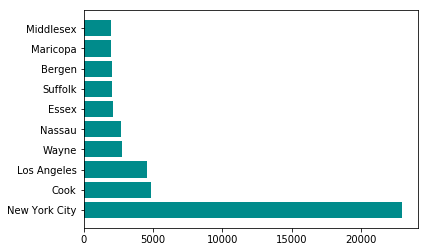

In [14]:
df = grouping.nlargest(10,'deaths')
print(df)
plt.barh(df['county'],df['deaths'],color="darkcyan")

Below we are filtering our data set in such a way that only the state and county of the address we previously specified is pulled up. This allows us to use a prediction for the location of the address instead of a generalized prediction

In [15]:
state = (df_covid19_county['state'] ==stateOfData)
df_state = df_covid19_county.loc[state]

county = (df_state['county']== county_data)
df_county = df_state.loc[county]
print(df_county.head())
print(county_data)
print(stateOfData)

            date       county           state     fips  cases  deaths
1532  2020-03-12  Mecklenburg  North Carolina  37119.0      2       0
1826  2020-03-13  Mecklenburg  North Carolina  37119.0      2       0
2180  2020-03-14  Mecklenburg  North Carolina  37119.0      2       0
2592  2020-03-15  Mecklenburg  North Carolina  37119.0      4       0
3054  2020-03-16  Mecklenburg  North Carolina  37119.0      4       0
Mecklenburg
North Carolina


# Prediction using Active Cases in a state Using ARIMA for timeseries

The data seems to have cumulative data and hence using diff to find out the actual new cases on the time series dataset

In [16]:
df_county['active_count'] = df_county.cases.diff()

In [17]:
print(df_county['active_count'].sum())

20677.0


In [18]:
df_active = df_county[['date','active_count']].copy()

print(df_active)

              date  active_count
1532    2020-03-12           NaN
1826    2020-03-13           0.0
2180    2020-03-14           0.0
2592    2020-03-15           2.0
3054    2020-03-16           0.0
...            ...           ...
378273  2020-07-28         227.0
381490  2020-07-29         217.0
384708  2020-07-30         337.0
387925  2020-07-31         241.0
391142  2020-08-01         177.0

[143 rows x 2 columns]


Below we are converting the date into datetime index in order to make possible for us to do statistical analysis

In [19]:
df_active['date']=pd.to_datetime(df_active['date'])

df_active.set_index('date',inplace = True)

Performing data clean up fixing all the NA's in data

In [20]:
df_active['active_count'] = df_active['active_count'].fillna(0)

Initial EDA clearly shows us that there is a trend in the covid active cases based on time

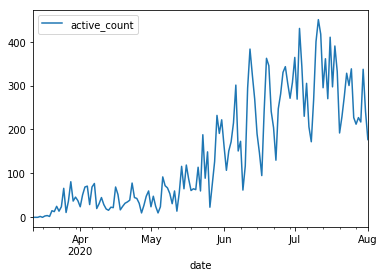

In [21]:
df_active.plot()

Here we get into performing a ARIMA moving average prediction of the timeseries for future. To start with we confirm that the average is moving with time

In [22]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

active_result=adfuller(df_active['active_count'])

In [23]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_active(active_count):
    result_active=adfuller(active_count)
    labels_active = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result_active,labels_active):
        print(label+' : '+str(value) )
    if result_active[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Ad Fuller test clearly indicates a moving average and hence we can apply ARIMA for predictions

In [24]:
adfuller_test_active(df_active['active_count'])

ADF Test Statistic : -1.0656964563356779
p-value : 0.7285561646974601
#Lags Used : 6
Number of Observations Used : 136
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


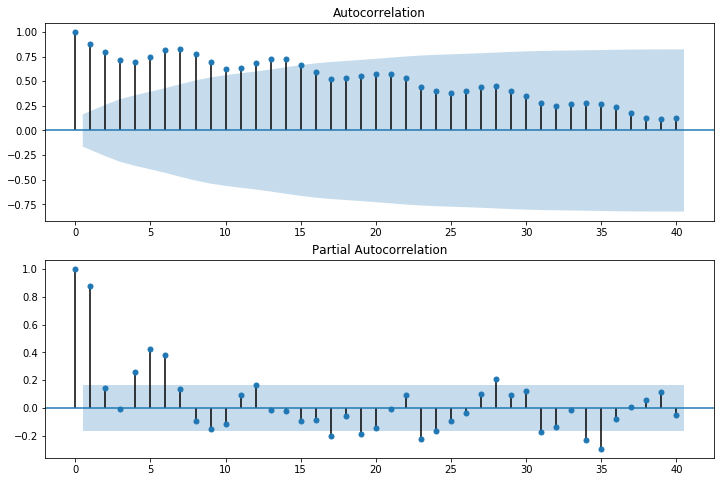

In [25]:
fig1 = plt.figure(figsize=(12,8))
ax1_1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df_active['active_count'],lags=40,ax=ax1_1)
ax2_1 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(df_active['active_count'],lags=40,ax=ax2_1)

In [26]:
print(df_active['active_count'])
from statsmodels.tsa.arima_model import ARIMA
model_active=ARIMA(df_active['active_count'],order=(5,0,4))
model_fit_active=model_active.fit()

date
2020-03-12      0.0
2020-03-13      0.0
2020-03-14      0.0
2020-03-15      2.0
2020-03-16      0.0
              ...  
2020-07-28    227.0
2020-07-29    217.0
2020-07-30    337.0
2020-07-31    241.0
2020-08-01    177.0
Name: active_count, Length: 143, dtype: float64


Here we have applied our ARIMA and superimposed the results on existing data to check

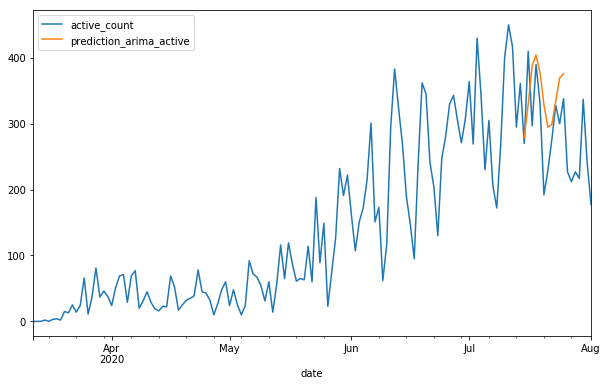

In [27]:
df_active['prediction_arima_active']=model_fit_active.predict(start=125,end=135,dynamic=True)
df_active[['active_count','prediction_arima_active']].plot(figsize=(10,6))

Now we are trying to use this for our prediction for next 10 days based on the current date. Below we are adding our future date values into the existing data and going to fill it up with projections from ARIMA model

In [28]:
from pandas.tseries.offsets import DateOffset
add_dates_active = [df_active.index[-1]+DateOffset(days=x) for x in range(0,10)]

future_dates_active = pd.DataFrame(index=add_dates_active[1:],columns=df_active.columns)

In [29]:
future_dates_active.head() 

,active_count,prediction_arima_active
2020-08-02,NaN,NaN
2020-08-03,NaN,NaN
2020-08-04,NaN,NaN
2020-08-05,NaN,NaN
2020-08-06,NaN,NaN


In [30]:
future_df_active_ar=pd.concat([df_active,future_dates_active])

Graph and table of future predictions for next 10 days based on a state and county of the address which the user has types in previously

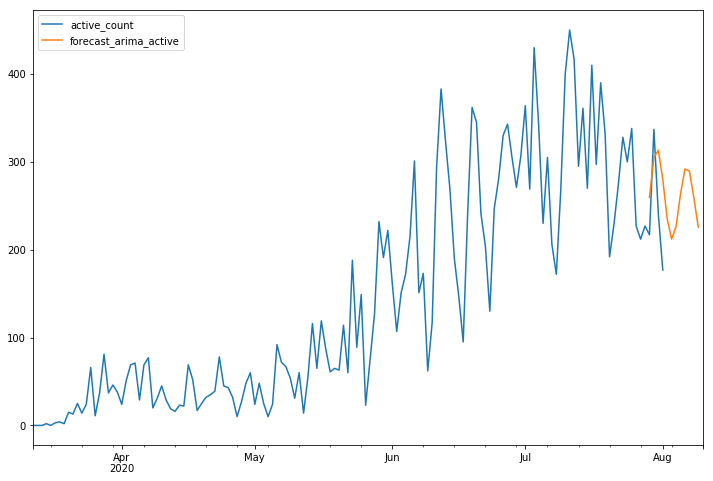

In [31]:
future_df_active_ar['forecast_arima_active'] = model_fit_active.predict(start = 139, end = 150, dynamic= True)  
future_df_active_ar[['active_count', 'forecast_arima_active']].plot(figsize=(12, 8))

In [32]:
#since we have used 10 in arima model to predict 10 days into future first row will always be current date
future_df_active_ar['forecast_arima_active'].tail(10)

2020-08-01    280.282829
2020-08-02    235.036058
2020-08-03    212.080556
2020-08-04    226.400070
2020-08-05    263.374573
2020-08-06    291.894736
2020-08-07    289.575471
2020-08-08    259.457562
2020-08-09    225.844458
2020-08-10           NaN
Name: forecast_arima_active, dtype: float64

# Combining the output of the two models - a) deriving the active cases of COVID based on a address done using KNN b) extrapolating those numbers and predicting future values of COVID based on ARIMA modelling of trend in the state

Here we are picking up the covid actives being predicted previously based on KNN and then injecting it as the current COVID rate in the arima model and adjusting the remaining projected values for future by proportionality and finding the numbers of the future covid cases based on a given geographical address

Thus we have a tool now to understand the location of an address dynamically, Find the covid confirmed and deaths dynamically and also zone the area. Further the tool is also predicting the actives for the next 10 days all a click of a button and based on realtime data feed coming in from  www.trackcorona.live and https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [33]:
print("Given address is: ", addressSearch)
location_string = str(location.latitude) + ", " + str(location.longitude)
location_given = geolocator.reverse(location_string)
print("Your state is : ", location_given.raw.get('address').get('state'))
print("Todays covid confirmed index based on your location is - ", round(covid_prediction[0][0]))
print("Todays covid deaths index based on your location is - ", round(covid_prediction[0][1]))
print("You are in ", returnZone(covid_prediction[0][0]))
compareFraction = round(covid_prediction[0][0])/future_df_active_ar['forecast_arima_active'].tail(10)[0]
covid_area_predictions = future_df_active_ar['forecast_arima_active'].tail(10)*compareFraction
print("The future 10 day active COVID predictions for ur location based on your state trend is: ")
print(round(covid_area_predictions))


Given address is:  9309 Kittansett Dr NC 28262
Your state is :  North Carolina
Todays covid confirmed index based on your location is -  3988
Todays covid deaths index based on your location is -  46
You are in  Red Zone
The future 10 day active COVID predictions for ur location based on your state trend is: 
2020-08-01    3988.0
2020-08-02    3344.0
2020-08-03    3018.0
2020-08-04    3221.0
2020-08-05    3747.0
2020-08-06    4153.0
2020-08-07    4120.0
2020-08-08    3692.0
2020-08-09    3213.0
2020-08-10       NaN
Name: forecast_arima_active, dtype: float64
